# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [10]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [11]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.1.4
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [13]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [14]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [15]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import time
from datetime import datetime
# Select the folder having data files
os.chdir('/Users/anjali.shaw/Documents/EDA Assignment/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
print(file_list)
# initialise an empty dataframe
data_sampled = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(file_path)
        # Reading the current file

        start = time.time()
        df = pd.read_parquet(file_path)
        df["tpep_pickup_date"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.date
        df["tpep_pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

        # Take unique values for date to iterate over
        dates = df["tpep_pickup_date"].unique()
        print(dates)
        for date in dates:
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
            print(f"Processing for {date} ")
            sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        
            # Iterate through each hour of the selected date
            hours = df["tpep_pickup_hour"].unique()
            #print(hours)
            for hour in hours:
                hour_data = pd.DataFrame()
                hour_data = df[(df["tpep_pickup_date"] == date) & (df["tpep_pickup_hour"] == hour)]
                # Sample 5% of the hourly data randomly                                
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
                #print(sampled_data.shape)
        # Concatenate the sampled data of all the dates to a single dataframe
            data_sampled = pd.concat([data_sampled, sampled_data])
            print(data_sampled.shape)
        #df = # we initialised this empty DF earlier
        end = time.time()
        print(f"Total runtime of the program is {end - start} seconds")
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

['2023-12.parquet', '2023-6.parquet', '2023-7.parquet', '2023-5.parquet', '2023-11.parquet', '2023-10.parquet', '2023-4.parquet', '2023-1.parquet', '2023-8.parquet', '2023-9.parquet', '2023-2.parquet', '2023-3.parquet']
/Users/anjali.shaw/Documents/EDA Assignment/Datasets and Dictionary/trip_records/2023-12.parquet
[datetime.date(2023, 12, 1) datetime.date(2023, 11, 30)
 datetime.date(2023, 12, 2) datetime.date(2023, 12, 3)
 datetime.date(2023, 12, 4) datetime.date(2023, 12, 5)
 datetime.date(2023, 12, 6) datetime.date(2023, 12, 7)
 datetime.date(2023, 12, 8) datetime.date(2023, 12, 9)
 datetime.date(2023, 12, 10) datetime.date(2002, 12, 31)
 datetime.date(2023, 12, 11) datetime.date(2023, 12, 12)
 datetime.date(2023, 12, 13) datetime.date(2023, 12, 14)
 datetime.date(2023, 12, 15) datetime.date(2023, 12, 16)
 datetime.date(2023, 12, 17) datetime.date(2023, 12, 18)
 datetime.date(2023, 12, 19) datetime.date(2023, 12, 20)
 datetime.date(2023, 12, 21) datetime.date(2023, 12, 22)
 datetim

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [21]:
data_sampled.shape

(1896400, 22)

In [18]:
# Store the df in csv/parquet
data_sampled.to_parquet('output_sample.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [27]:
# Load the new data file
df = pd.read_parquet("output_sample.parquet")
df.shape

(1896400, 22)

In [28]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,tpep_pickup_date,tpep_pickup_hour,airport_fee
1788,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,...,0.5,5.66,0.0,1.0,33.96,2.5,0.0,2023-12-01,0,NaN
3196699,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,None,231,61,0,...,0.5,3.00,0.0,1.0,29.43,NaN,NaN,2023-12-01,0,NaN
1408,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,...,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-12-01,0,NaN
3196663,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,None,137,144,0,...,0.5,0.00,0.0,1.0,21.22,NaN,NaN,2023-12-01,0,NaN
3613,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,...,0.5,0.00,0.0,1.0,10.10,2.5,0.0,2023-12-01,0,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 1788 to 3202916
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [30]:
df.isna().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            64874
trip_distance                  0
RatecodeID                 64874
store_and_fwd_flag         64874
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       64874
Airport_fee               213357
tpep_pickup_date               0
tpep_pickup_hour               0
airport_fee              1747917
dtype: int64

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [31]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,tpep_pickup_date,tpep_pickup_hour,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,...,0.5,5.66,0.0,1.0,33.96,2.5,0.0,2023-12-01,0,NaN
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,None,231,61,0,...,0.5,3.00,0.0,1.0,29.43,NaN,NaN,2023-12-01,0,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,...,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-12-01,0,NaN
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,None,137,144,0,...,0.5,0.00,0.0,1.0,21.22,NaN,NaN,2023-12-01,0,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,...,0.5,0.00,0.0,1.0,10.10,2.5,0.0,2023-12-01,0,NaN


In [32]:
df.drop(columns='store_and_fwd_flag', inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,tpep_pickup_date,tpep_pickup_hour,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.30,...,0.5,5.66,0.0,1.0,33.96,2.5,0.0,2023-12-01,0,NaN
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,231,61,0,22.43,...,0.5,3.00,0.0,1.0,29.43,NaN,NaN,2023-12-01,0,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.70,...,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-12-01,0,NaN
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,137,144,0,17.22,...,0.5,0.00,0.0,1.0,21.22,NaN,NaN,2023-12-01,0,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.10,...,0.5,0.00,0.0,1.0,10.10,2.5,0.0,2023-12-01,0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [33]:
# Combine the two airport fee columns
cols = ["airport_fee","Airport_fee"]
df = df.assign(airport_fee=df[cols].sum(1),skipna=False)
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           64874
trip_distance                 0
RatecodeID                64874
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      64874
Airport_fee              213357
tpep_pickup_date              0
tpep_pickup_hour              0
airport_fee                   0
skipna                        0
dtype: int64

In [34]:
df = df.drop(["Airport_fee"],axis=1)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [35]:
# check where values of fare amount are negative
df[df.fare_amount<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_hour,airport_fee,skipna


Did you notice something different in the `RatecodeID` column for above records?

In [36]:
# Analyse RatecodeID for the negative fare amounts
df.RatecodeID.unique()


array([ 1., nan,  5.,  4.,  2.,  3., 99.,  6.])

In [39]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include=['float64', 'int64'])
negative_columns = numeric_df.columns[(numeric_df < 0).any()]
print("Columns with negative values:", list(negative_columns))


Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [47]:
# fix these negative values
df=df[~df[['extra','mta_tax','improvement_surcharge','total_amount','congestion_surcharge','airport_fee']].lt(0).any(axis=1)]
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_hour,airport_fee,skipna
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.30,...,0.5,5.66,0.0,1.0,33.96,2.5,2023-12-01,0,0.0,False
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,231,61,0,22.43,...,0.5,3.00,0.0,1.0,29.43,NaN,2023-12-01,0,0.0,False
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.70,...,0.5,3.14,0.0,1.0,18.84,2.5,2023-12-01,0,0.0,False
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,137,144,0,17.22,...,0.5,0.00,0.0,1.0,21.22,NaN,2023-12-01,0,0.0,False
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.10,...,0.5,0.00,0.0,1.0,10.10,2.5,2023-12-01,0,0.0,False


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [50]:
# Find the proportion of missing values in each column
missing_proportions = df.isna().mean()
print(round(missing_proportions*100,2))
## 3.42 % rows with RatecodeID as null - same number passenger_count, congestion_surcharge is null  

VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          3.42
trip_distance            0.00
RatecodeID               3.42
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     3.42
tpep_pickup_date         0.00
tpep_pickup_hour         0.00
airport_fee              0.00
skipna                   0.00
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [53]:
# Display the rows with null values
df[df.passenger_count.isna()]
# Impute NaN values in 'passenger_count'
# replacing with median
median_value = df['passenger_count'].median()
df['passenger_count'].fillna(median_value, inplace=True)
df[df.passenger_count.isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_hour,airport_fee,skipna


Did you find zeroes in passenger_count? Handle these.

In [54]:
df.passenger_count.value_counts()
#29681 rows with 0 passenger count

passenger_count
1.0    1442042
2.0     277283
3.0      69032
4.0      38532
0.0      29681
5.0      23871
6.0      15859
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64

In [56]:
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
tpep_pickup_date             0
tpep_pickup_hour             0
airport_fee                  0
skipna                       0
dtype: int64

In [55]:
# removing rows with 0 passenger count
df.isna().sum()
df = df[df.passenger_count != 0]
df.shape

(1866640, 21)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [57]:
df.RatecodeID.isna().sum()

64874

In [58]:
# Fix missing values in 'RatecodeID'
mode_value = df.RatecodeID.mode()[0]
df.RatecodeID.fillna(mode_value, inplace=True)
df.RatecodeID.isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [60]:
# handle null values in congestion_surcharge

df.congestion_surcharge.isna().sum()
df['congestion_surcharge'].value_counts(dropna=True)

congestion_surcharge
2.5    1663055
0.0     138710
0.5          1
Name: count, dtype: int64

In [63]:
mode_value = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'].fillna(mode_value, inplace=True)
df.shape
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
tpep_pickup_date         0
tpep_pickup_hour         0
airport_fee              0
skipna                   0
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values



### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [64]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_hour,airport_fee
count,1.866640e+06,1866640,1866640,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06
mean,1.744619e+00,2023-07-02 23:54:35.156987904,2023-07-03 00:12:03.801033984,1.378150e+00,3.875038e+00,1.619864e+00,1.652480e+02,1.640227e+02,1.162249e+00,1.996235e+01,1.561189e+00,4.953202e-01,3.555335e+00,5.998000e-01,9.990698e-01,2.903906e+01,2.314224e+00,1.426855e+01,1.387575e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 18:11:20.500000,2023-04-02 18:29:17.750000128,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,1.100000e+01,0.000000e+00
50%,2.000000e+00,2023-06-27 19:32:38,2023-06-27 19:46:11,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.108000e+01,2.500000e+00,1.500000e+01,0.000000e+00
75%,2.000000e+00,2023-10-06 23:37:18.750000128,2023-10-06 23:54:43.750000128,1.000000e+00,3.410000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.229000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.100000e+01,2.500000e+00,1.900000e+01,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,2.300000e+01,1.750000e+00
std,4.414960e-01,NaN,NaN,8.699587e-01,1.304351e+02,7.312306e+00,6.400130e+01,6.981914e+01,5.076060e-01,1.063548e+02,1.820560e+00,4.840724e-02,4.056998e+00,2.193114e+00,2.804540e-02,1.072306e+02,6.556882e-01,5.814620e+00,4.586835e-01


In [79]:
# checking outliers in each column
def check_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Column: {column}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Column {column} : Number of outliers:{outliers.shape[0]}")
    #print(f"Percentage of outliers: {outliers.shape[0] / len(df) * 100:.2f}%")
    
    return outliers.shape[0]

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    check_outliers(df, col)



Column: VendorID
Lower bound: -0.5
Upper bound: 3.5
Column VendorID : Number of outliers:0
Column: passenger_count
Lower bound: 1.0
Upper bound: 1.0
Column passenger_count : Number of outliers:424557
Column: trip_distance
Lower bound: -2.435
Upper bound: 6.885
Column trip_distance : Number of outliers:238666
Column: RatecodeID
Lower bound: 1.0
Upper bound: 1.0
Column RatecodeID : Number of outliers:101010
Column: PULocationID
Lower bound: -21.0
Upper bound: 387.0
Column PULocationID : Number of outliers:0
Column: DOLocationID
Lower bound: -66.0
Upper bound: 414.0
Column DOLocationID : Number of outliers:0
Column: payment_type
Lower bound: 1.0
Upper bound: 1.0
Column payment_type : Number of outliers:332431
Column: fare_amount
Lower bound: -9.599999999999998
Upper bound: 40.8
Column fare_amount : Number of outliers:189395
Column: extra
Lower bound: -3.75
Upper bound: 6.25
Column extra : Number of outliers:32643
Column: mta_tax
Lower bound: 0.5
Upper bound: 0.5
Column mta_tax : Number of

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [67]:
# remove passenger_count > 6
df.passenger_count.value_counts()

passenger_count
1.0    1442042
2.0     277283
3.0      69032
4.0      38532
5.0      23871
6.0      15859
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64

In [68]:
df = df[df['passenger_count']<=6]
df.shape

(1866619, 21)

In [74]:
# Continue with outlier handling
df=df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]
df.reset_index(drop=True, inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_hour,airport_fee,skipna
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.3,...,0.5,5.66,0.0,1.0,33.96,2.5,2023-12-01,0,0.0,False
1,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.7,...,0.5,3.14,0.0,1.0,18.84,2.5,2023-12-01,0,0.0,False
2,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.1,...,0.5,0.00,0.0,1.0,10.10,2.5,2023-12-01,0,0.0,False
3,2,2023-12-01 00:57:08,2023-12-01 01:05:49,1.0,1.66,1.0,114,186,1,10.7,...,0.5,3.14,0.0,1.0,18.84,2.5,2023-12-01,0,0.0,False
4,2,2023-12-01 00:46:28,2023-12-01 00:59:29,2.0,2.45,1.0,164,232,1,14.9,...,0.5,1.00,0.0,1.0,20.90,2.5,2023-12-01,0,0.0,False


In [78]:
# Do any columns need standardising?
for col in numeric_cols:
    check_outliers(df, col)


Column VendorID : Number of outliers:0
Column passenger_count : Number of outliers:424557
Column trip_distance : Number of outliers:238666
Column RatecodeID : Number of outliers:101010
Column PULocationID : Number of outliers:0
Column DOLocationID : Number of outliers:0
Column payment_type : Number of outliers:332431
Column fare_amount : Number of outliers:189395
Column extra : Number of outliers:32643
Column mta_tax : Number of outliers:16784
Column tip_amount : Number of outliers:140152
Column tolls_amount : Number of outliers:147054
Column improvement_surcharge : Number of outliers:1420
Column total_amount : Number of outliers:212556
Column congestion_surcharge : Number of outliers:138608
Column airport_fee : Number of outliers:159242


In [80]:
# Fare greater than 5000
df = df[df['fare_amount'] <= 5000]
# Tip amount is greater than fare amount, with total amount greater than 100
df = df[~(((df['tip_amount']) > (df['fare_amount'])) & (df['total_amount'] > 100 ))]

In [81]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
VendorID,1801494.0,1.748391,0.433938,1.0,1.00,2.00,2.00,2.00
passenger_count,1801494.0,1.391692,0.882189,1.0,1.00,1.00,1.00,6.00
trip_distance,1801494.0,3.454870,4.554858,0.0,1.06,1.79,3.39,204.86
RatecodeID,1801494.0,1.641657,7.439521,1.0,1.00,1.00,1.00,99.00
PULocationID,1801494.0,165.428416,63.668099,1.0,132.00,162.00,234.00,265.00
DOLocationID,1801494.0,164.308802,69.756051,1.0,114.00,162.00,234.00,265.00
payment_type,1801494.0,1.204075,0.465286,1.0,1.00,1.00,1.00,4.00
fare_amount,1801494.0,19.778508,18.291650,0.0,9.30,13.50,21.90,1375.00
extra,1801494.0,1.611285,1.828006,0.0,0.00,1.00,2.50,14.25
mta_tax,1801494.0,0.495368,0.048172,0.0,0.50,0.50,0.50,4.00


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [82]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'tpep_pickup_date',
 'tpep_pickup_hour',
 'airport_fee',
 'skipna']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount` : Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

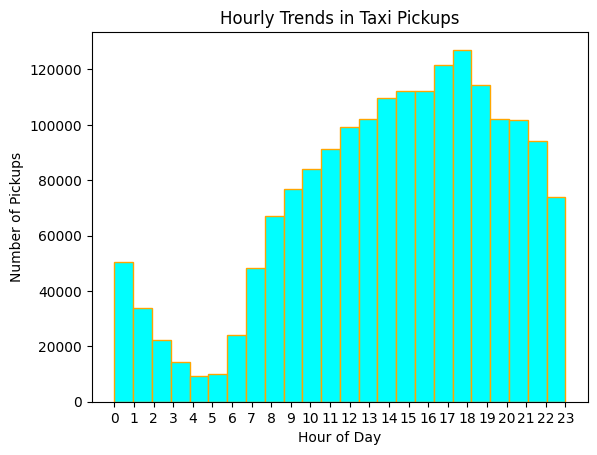

In [85]:
# Find and show the hourly trends in taxi pickups
plt.hist(df.tpep_pickup_hour, bins=24, edgecolor='orange',color='cyan')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()
# Insight - Early hours around 4 to 6 AM are low, whereas evening hours 17 to 19 hours is the highest

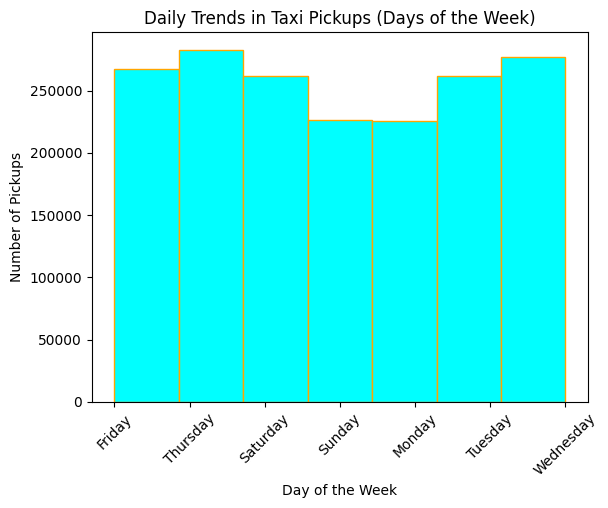

In [86]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_dayofweek'] = df.tpep_pickup_datetime.dt.day_name()
plt.hist(df.tpep_pickup_dayofweek, bins=7, edgecolor='orange',color='cyan')
plt.title('Daily Trends in Taxi Pickups (Days of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show() 
# Insight - Majorly all days have similar numbers, Sunday and Monday and marginally lower, while Wednusday and Thursday are marginally higher.

In [91]:
# Show the monthly trends in pickups

df['tpep_pickup_month'] = df.tpep_pickup_datetime.dt.month_name()
months_in_order  = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df.index = pd.CategoricalIndex(df.tpep_pickup_month, categories=months_in_order, ordered=True)
df = df.sort_index().reset_index(drop=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_hour,airport_fee,skipna,tpep_pickup_dayofweek,tpep_pickup_month
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.4,...,0.0,1.0,41.15,0.0,2023-01-01,0,1.25,False,Sunday,January
1,2,2023-01-21 13:18:30,2023-01-21 13:38:35,1.0,3.33,1.0,100,141,1,20.5,...,0.0,1.0,26.00,2.5,2023-01-21,13,0.00,False,Saturday,January
2,2,2023-01-21 13:18:56,2023-01-21 13:24:12,1.0,0.74,1.0,238,151,1,7.2,...,0.0,1.0,14.56,2.5,2023-01-21,13,0.00,False,Saturday,January
3,2,2023-01-21 13:17:59,2023-01-21 13:39:07,1.0,2.29,1.0,107,230,1,19.8,...,0.0,1.0,28.56,2.5,2023-01-21,13,0.00,False,Saturday,January
4,1,2023-01-21 13:59:17,2023-01-21 14:17:22,2.0,3.00,1.0,79,141,1,17.0,...,0.0,1.0,24.00,2.5,2023-01-21,13,0.00,False,Saturday,January


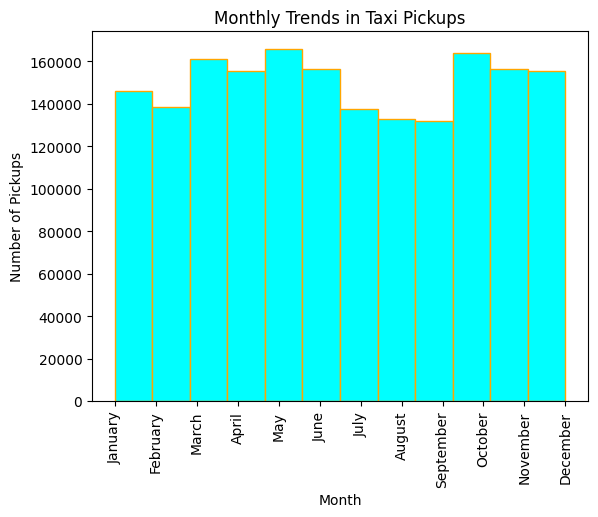

In [92]:
# Show the monthly trends in pickups
plt.hist(df.tpep_pickup_month, bins=12, edgecolor='orange',color='cyan')
plt.xticks(rotation=90)
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show() 
# Insight - Majorly all months have similar numbers, Sept and Aug and marginally lower, while Oct and May are marginally higher.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [93]:
# Analyse the above parameters
numeric_df = df.select_dtypes(include=['float64', 'int64'])
negative_columns = numeric_df.columns[(numeric_df < 0).any()]
print("Columns with negative values:", list(negative_columns))


Columns with negative values: []


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [94]:
zero_columns = []
for column in df.select_dtypes(include=['float64', 'int64']):
    if (df[column] == 0).any():
        zero_columns.append(column)
        
zero_columns

['trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [95]:
df[df.mta_tax == 0]
# Zero values should be OK in columns like  extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', congestion_surcharge', 'airport_fee'

# Zero values should be removed in columns like 'trip_distance', 'fare_amount','total_amount'

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_hour,airport_fee,skipna,tpep_pickup_dayofweek,tpep_pickup_month
98,2,2023-01-21 13:12:22,2023-01-21 13:12:25,1.0,0.00,5.0,125,125,1,82.00,...,0.00,1.0,99.60,0.0,2023-01-21,13,0.00,False,Saturday,January
130,2,2023-01-21 13:59:56,2023-01-21 14:33:48,2.0,16.85,3.0,48,1,2,87.40,...,12.75,1.0,102.40,0.0,2023-01-21,13,1.25,False,Saturday,January
312,2,2023-01-21 12:24:31,2023-01-21 12:50:09,1.0,18.31,3.0,230,1,1,88.80,...,19.75,1.0,109.55,0.0,2023-01-21,12,0.00,False,Saturday,January
335,2,2023-01-21 12:01:18,2023-01-21 12:29:04,6.0,17.41,3.0,230,1,2,86.00,...,14.75,1.0,101.75,0.0,2023-01-21,12,0.00,False,Saturday,January
518,1,2023-01-21 12:33:14,2023-01-21 13:07:40,1.0,19.10,3.0,239,1,1,93.00,...,14.75,1.0,118.75,0.0,2023-01-21,12,0.00,False,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800884,2,2023-12-19 10:58:45,2023-12-19 12:08:23,1.0,35.92,4.0,132,1,2,156.30,...,25.50,1.0,184.55,0.0,2023-12-19,10,1.75,False,Tuesday,December
1801010,1,2023-12-19 06:54:28,2023-12-19 06:55:50,1.0,0.00,5.0,236,236,1,25.00,...,0.00,1.0,31.20,0.0,2023-12-19,6,0.00,False,Tuesday,December
1801218,1,2023-12-19 08:24:39,2023-12-19 08:52:28,1.0,15.80,3.0,13,1,1,81.10,...,21.69,1.0,124.55,0.0,2023-12-19,8,0.00,False,Tuesday,December
1801276,2,2023-12-19 08:04:16,2023-12-19 08:04:28,1.0,0.00,5.0,138,138,1,63.76,...,6.94,1.0,93.79,0.0,2023-12-19,8,1.75,False,Tuesday,December


In [96]:
# Create a df with non zero entries for the selected parameters.
df[df.trip_distance == 0] 
df[df.fare_amount == 0] 
df[df.total_amount == 0] 
df.shape


(1801494, 23)

In [97]:
# Create a df with non zero entries for the selected parameters.
df = df[~(df.trip_distance == 0)]
df = df[~(df.fare_amount == 0)]
df = df[~(df.total_amount == 0)]
df.shape


(1779253, 23)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [98]:
# Group data by month and analyse monthly revenue

df.groupby(['tpep_pickup_month'])['total_amount'].sum()

tpep_pickup_month
April        4402295.66
August       3824314.11
December     4471594.75
February     3720967.97
January      3934448.49
July         3930942.90
June         4514673.01
March        4482774.50
May          4795962.34
November     4496683.19
October      4822007.77
September    3905367.62
Name: total_amount, dtype: float64

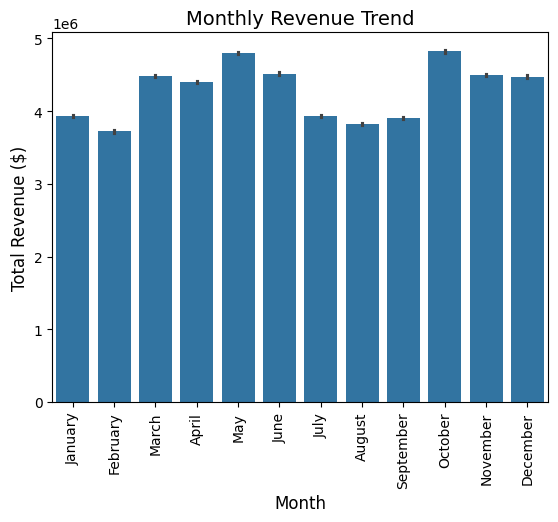

In [100]:
# Group data by month and analyse monthly revenue
sns.barplot(x=df.tpep_pickup_month, y=df.total_amount, estimator=np.sum)
plt.xticks(rotation=90)
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.show()
#Insight - Majorly all months have similar numbers, Feb and Aug and marginally lower, while Oct and May are marginally higher.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [105]:
# Calculate proportion of each quarter
# Add Quarter of the year
df['tpep_pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')
newdf = df.groupby('tpep_pickup_quarter')
newdf.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_hour,airport_fee,skipna,tpep_pickup_dayofweek,tpep_pickup_month,tpep_pickup_quarter
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.4,...,1.0,41.15,0.0,2023-01-01,0,1.25,False,Sunday,January,2023Q1
1,2,2023-01-21 13:18:30,2023-01-21 13:38:35,1.0,3.33,1.0,100,141,1,20.5,...,1.0,26.00,2.5,2023-01-21,13,0.00,False,Saturday,January,2023Q1
2,2,2023-01-21 13:18:56,2023-01-21 13:24:12,1.0,0.74,1.0,238,151,1,7.2,...,1.0,14.56,2.5,2023-01-21,13,0.00,False,Saturday,January,2023Q1
3,2,2023-01-21 13:17:59,2023-01-21 13:39:07,1.0,2.29,1.0,107,230,1,19.8,...,1.0,28.56,2.5,2023-01-21,13,0.00,False,Saturday,January,2023Q1
4,1,2023-01-21 13:59:17,2023-01-21 14:17:22,2.0,3.00,1.0,79,141,1,17.0,...,1.0,24.00,2.5,2023-01-21,13,0.00,False,Saturday,January,2023Q1
445563,1,2023-04-22 18:05:45,2023-04-22 18:11:36,1.0,1.00,1.0,238,142,1,7.2,...,1.0,13.45,2.5,2023-04-22,18,0.00,False,Saturday,April,2023Q2
445564,2,2023-04-08 15:58:03,2023-04-08 16:20:45,1.0,2.35,1.0,141,164,1,19.8,...,1.0,28.56,2.5,2023-04-08,15,0.00,False,Saturday,April,2023Q2
445565,1,2023-04-08 15:36:48,2023-04-08 15:58:40,1.0,2.60,1.0,141,79,1,19.1,...,1.0,27.70,2.5,2023-04-08,15,0.00,False,Saturday,April,2023Q2
445566,2,2023-04-08 15:54:07,2023-04-08 16:13:48,2.0,1.80,1.0,161,68,1,17.7,...,1.0,24.20,2.5,2023-04-08,15,0.00,False,Saturday,April,2023Q2
445567,2,2023-04-08 15:37:32,2023-04-08 15:50:58,1.0,2.28,1.0,125,137,1,14.9,...,1.0,22.11,2.5,2023-04-08,15,0.00,False,Saturday,April,2023Q2


In [102]:
quarterly_revenue = df.groupby('tpep_pickup_quarter')['total_amount'].sum().reset_index()
total_yearly_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = round((quarterly_revenue['total_amount'] / total_yearly_revenue),2)
quarterly_revenue.head()

,tpep_pickup_quarter,total_amount,proportion
0,2022Q4,13.50,0.00
1,2023Q1,12138190.96,0.24
2,2023Q2,13712931.01,0.27
3,2023Q3,11660624.63,0.23
4,2023Q4,13790272.21,0.27


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

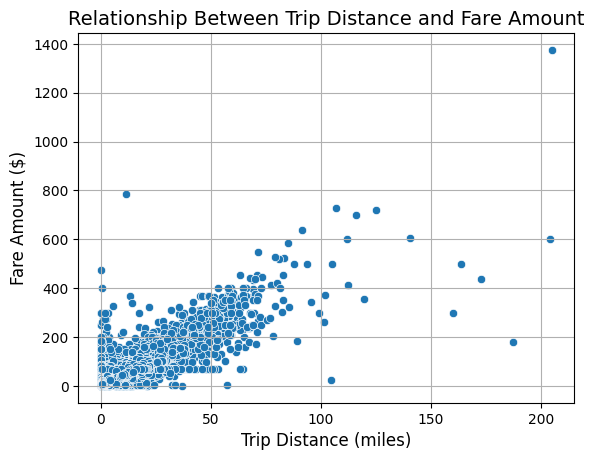

In [103]:
# Show how trip fare is affected by distance
sns.scatterplot(x=df.trip_distance,y=df.fare_amount)
plt.title('Relationship Between Trip Distance and Fare Amount', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.show()
#Insight - Longer trip distances generally correspond to higher fare amounts, though variability increases with distance.


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [107]:
# Add a column for duration in mins
df['trip_duration_mins'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.total_seconds().div(60).round(0).astype(int)

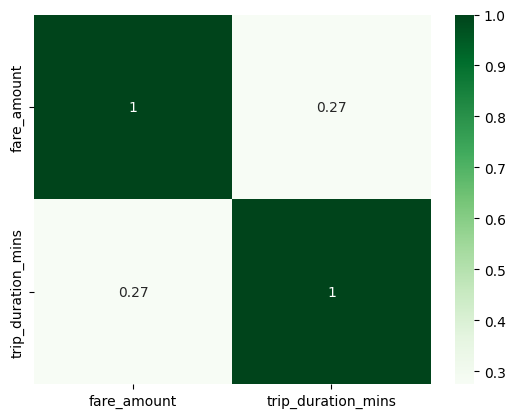

In [108]:
# Show relationship between fare and trip duration
sns.heatmap(df[['fare_amount','trip_duration_mins']].corr(),cmap='Greens',annot=True)
plt.show()


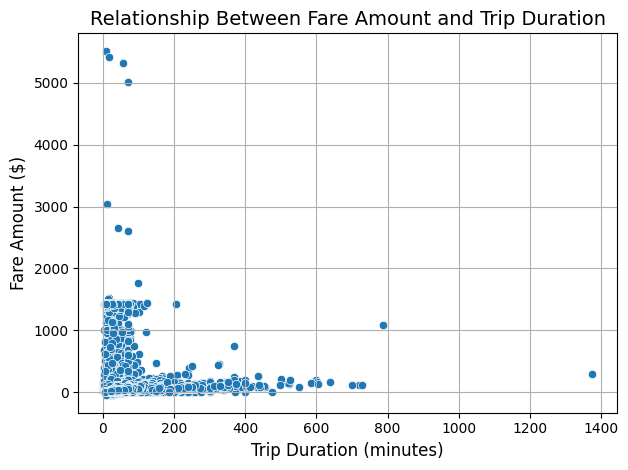

In [109]:
sns.scatterplot(x=df.fare_amount,y=df.trip_duration_mins)
plt.title('Relationship Between Fare Amount and Trip Duration', fontsize=14)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
#Insight - Fare amount tends to be higher for shorter trip durations, with significant fare outliers in short trips.

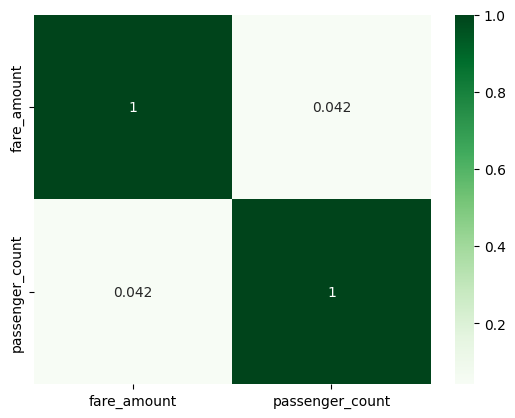

In [110]:
# Show relationship between fare and number of passengers

sns.heatmap(df[['fare_amount','passenger_count']].corr(),cmap='Greens',annot=True)
plt.show()


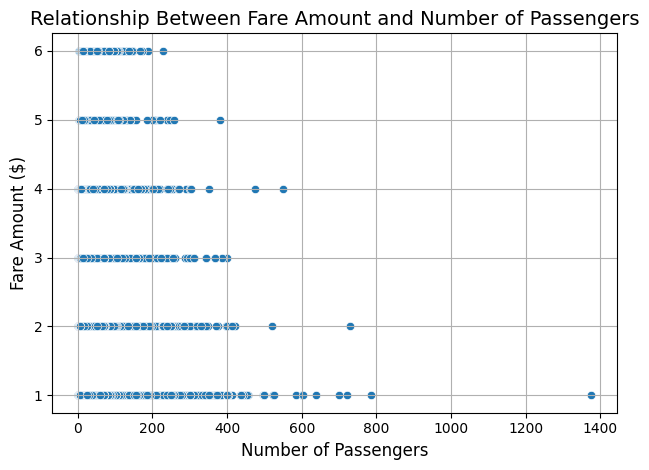

In [111]:
sns.scatterplot(x=df.fare_amount,y=df.passenger_count)
plt.title('Relationship Between Fare Amount and Number of Passengers', fontsize=14)
plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

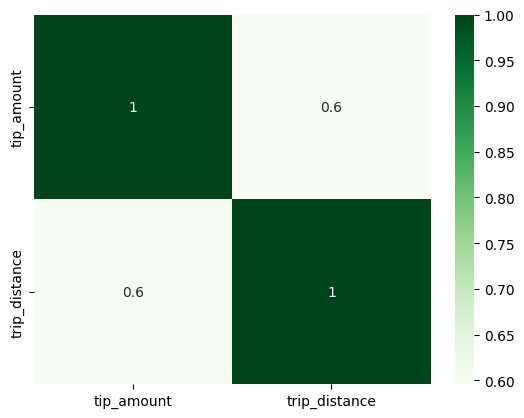

In [112]:
# Show relationship between tip and trip distance

sns.heatmap(df[['tip_amount','trip_distance']].corr(),cmap='Greens',annot=True)
plt.show()

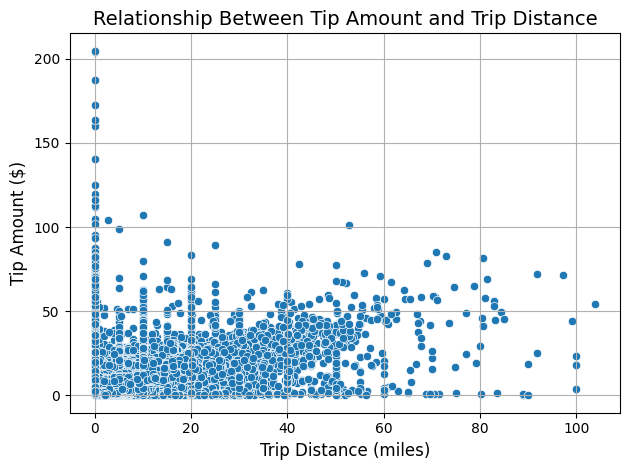

In [113]:
sns.scatterplot(x=df.tip_amount,y=df.trip_distance)
plt.title('Relationship Between Tip Amount and Trip Distance', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
#Insight - Tip amounts are highly variable and generally low, with no strong correlation to trip distance.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

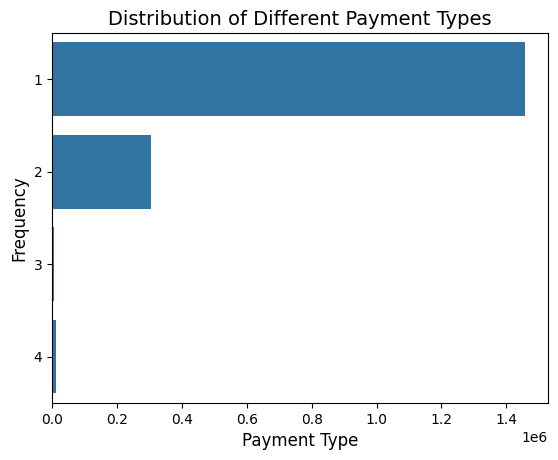

In [115]:
# Analyse the distribution of different payment types (payment_type).
df.payment_type.value_counts()
# Analyse the distribution of different payment types (payment_type).
sns.countplot(y=df.payment_type)
plt.title('Distribution of Different Payment Types', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
#Insight - Credit Card is the most preferred payment type followed by Cash


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [120]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/Users/anjali.shaw/Documents/EDA Assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

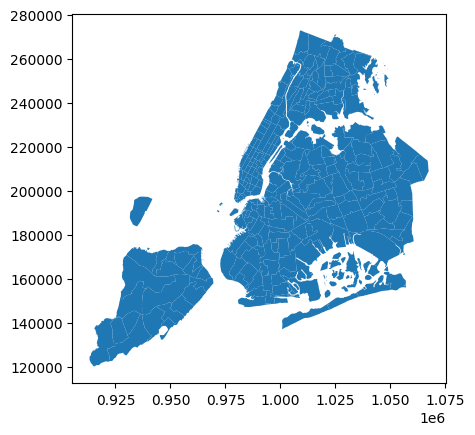

In [121]:
print(zones.info())
zones.plot()

<Axes: >

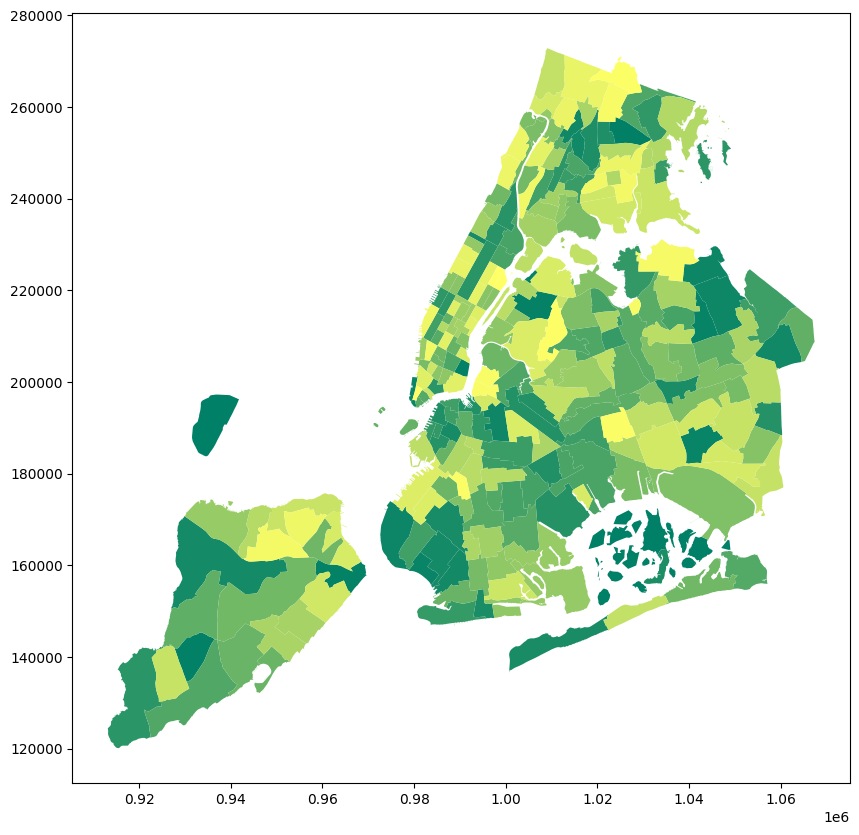

In [122]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones.plot(ax = ax,legend = True,cmap='summer')

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [123]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df,zones,how='inner',left_on='PULocationID',right_on='LocationID')
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tpep_pickup_month,tpep_pickup_quarter,trip_duration_mins,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.4,...,January,2023Q1,16,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-21 13:57:03,2023-01-21 14:21:37,1.0,6.57,1.0,138,229,1,31.0,...,January,2023Q1,25,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
2,1,2023-01-21 12:09:03,2023-01-21 12:33:32,1.0,8.70,1.0,138,164,1,39.4,...,January,2023Q1,24,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
3,2,2023-01-21 12:13:43,2023-01-21 12:39:40,1.0,11.31,1.0,138,163,1,45.7,...,January,2023Q1,26,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
4,2,2023-01-21 12:28:32,2023-01-21 12:50:03,1.0,9.81,1.0,138,141,2,40.1,...,January,2023Q1,22,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."


In [124]:
merged_df.shape

(1763327, 32)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [125]:
# Group data by location and calculate the number of trips
merged_df.LocationID.unique().size


251

In [126]:
aggregated_data = merged_df.groupby(['LocationID']).agg(
    trips=('LocationID', 'count')
)

print(aggregated_data)

            trips
LocationID       
1              47
2               2
3              31
4            1775
5               9
...           ...
259            35
260           299
261          9370
262         23125
263         34096

[251 rows x 1 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [127]:
# Merge trip counts back to the zones GeoDataFrame
merged_df1 = pd.merge(zones,aggregated_data,how='left',on='LocationID')
merged_df1.head()



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",47.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",31.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1775.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",9.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

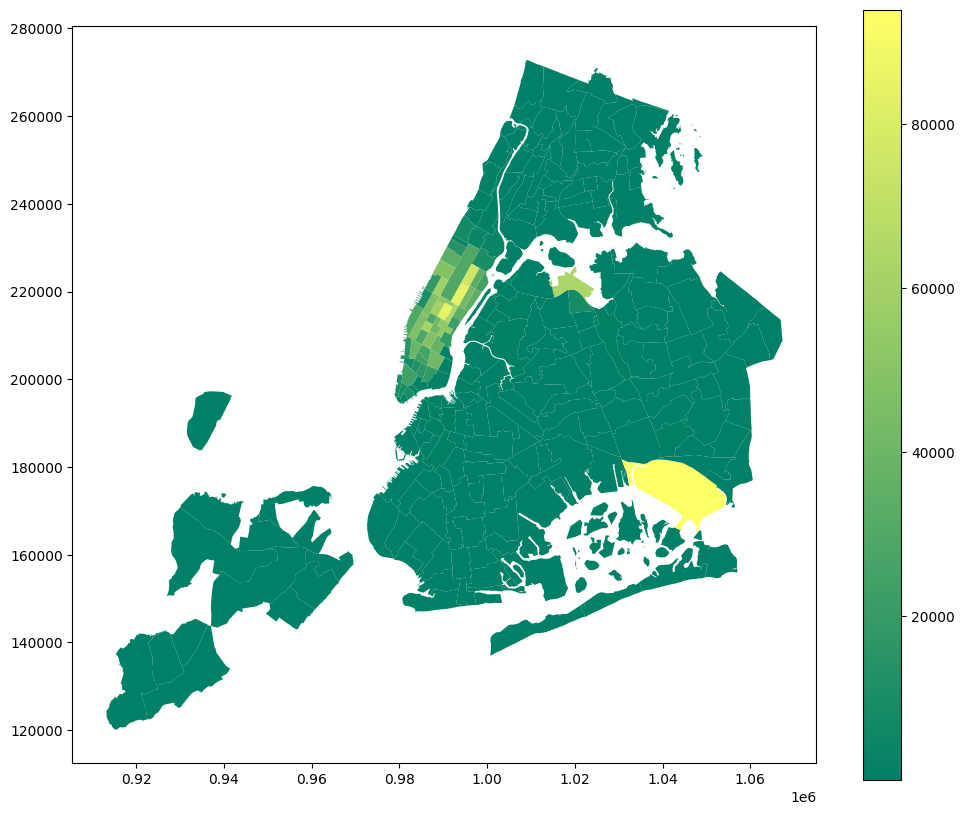

In [128]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
merged_df1.plot(ax = ax,legend = True,column='trips',cmap='summer')
plt.show()



In [129]:
# can you try displaying the zones DF sorted by the number of trips?
merged_df1_sorted = merged_df1.sort_values(by='trips',ascending=False)
merged_df1_sorted.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",93936.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",85002.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",83988.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",75706.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",64175.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [130]:
# Find routes which have the slowest speeds at different times of the day

df['avg_trip_duration_per_hour']=df.groupby('tpep_pickup_hour')['trip_duration_mins'].transform('mean')
df['route_speed'] = round((df['trip_distance']/df['avg_trip_duration_per_hour']),5)
df_sorted = df.sort_values(by='route_speed')
df_sorted.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tpep_pickup_date,tpep_pickup_hour,airport_fee,skipna,tpep_pickup_dayofweek,tpep_pickup_month,tpep_pickup_quarter,trip_duration_mins,avg_trip_duration_per_hour,route_speed
1721747,2,2023-12-05 16:22:23,2023-12-05 16:22:30,2.0,0.01,2.0,161,161,1,70.0,...,2023-12-05,16,0.0,False,Tuesday,December,2023Q4,0,20.687731,0.00048
932415,2,2023-07-20 16:57:46,2023-07-20 16:57:53,1.0,0.01,1.0,48,48,4,3.0,...,2023-07-20,16,0.0,False,Thursday,July,2023Q3,0,20.687731,0.00048
605560,2,2023-05-05 16:04:09,2023-05-05 16:04:26,1.0,0.01,1.0,90,234,3,3.0,...,2023-05-05,16,0.0,False,Friday,May,2023Q2,0,20.687731,0.00048
734122,2,2023-05-18 16:51:36,2023-05-18 16:51:53,2.0,0.01,2.0,230,230,1,70.0,...,2023-05-18,16,0.0,False,Thursday,May,2023Q2,0,20.687731,0.00048
729657,2,2023-05-18 16:12:57,2023-05-18 16:13:02,4.0,0.01,5.0,134,134,1,85.0,...,2023-05-18,16,0.0,False,Thursday,May,2023Q2,0,20.687731,0.00048
488330,2,2023-04-03 16:04:20,2023-04-03 16:05:29,1.0,0.01,1.0,68,68,2,3.7,...,2023-04-03,16,0.0,False,Monday,April,2023Q2,1,20.687731,0.00048
562193,2,2023-04-28 16:12:31,2023-04-28 16:13:38,3.0,0.01,1.0,163,163,1,3.0,...,2023-04-28,16,0.0,False,Friday,April,2023Q2,1,20.687731,0.00048
1637061,2,2023-11-18 16:22:49,2023-11-18 16:23:03,2.0,0.01,2.0,244,244,3,70.0,...,2023-11-18,16,0.0,False,Saturday,November,2023Q4,0,20.687731,0.00048
1131,2,2023-01-21 16:37:14,2023-01-21 16:49:02,1.0,0.01,1.0,170,230,1,10.7,...,2023-01-21,16,0.0,False,Saturday,January,2023Q1,12,20.687731,0.00048
743074,2,2023-05-16 16:01:23,2023-05-16 16:01:28,1.0,0.01,2.0,246,246,2,70.0,...,2023-05-16,16,0.0,False,Tuesday,May,2023Q2,0,20.687731,0.00048


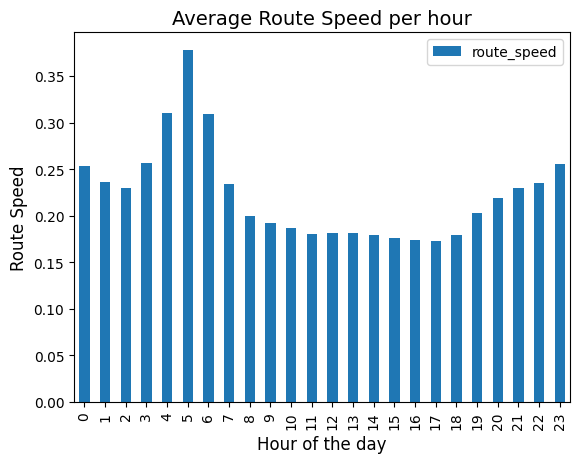

In [131]:
hour_route_speed = df.groupby(['tpep_pickup_hour']).agg(
    route_speed=('route_speed', 'mean')
)

hour_route_speed.plot.bar()
plt.title('Average Route Speed per hour', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Route Speed', fontsize=12)
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

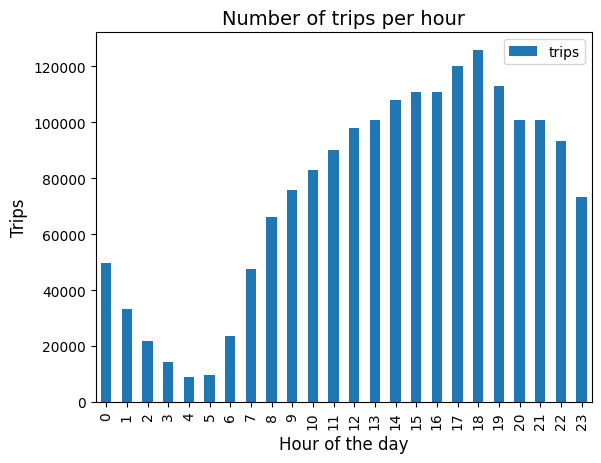

The busiest hour is 18 with 125842 trips.


In [132]:

# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df.groupby(['tpep_pickup_hour']).agg(
    trips=('tpep_pickup_hour', 'count')
)
trips_per_hour.plot.bar()
plt.title('Number of trips per hour', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Trips', fontsize=12)
plt.show()

# Insight - Early hours around 4 to 6 AM, we have lowest trips. While late evening hours 17 to 19 hours is the highest
busiest_hour = trips_per_hour.idxmax(axis=0,numeric_only=True)[0]
busiest_hour_count = trips_per_hour.max(axis=0,numeric_only=True)[0]

print(f"The busiest hour is {busiest_hour} with {busiest_hour_count} trips.")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

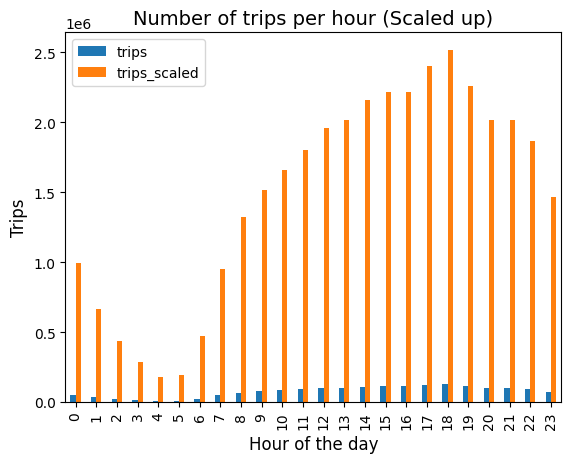

In [133]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
trips_per_hour['trips_scaled'] = trips_per_hour.trips/sample_fraction

trips_per_hour.plot.bar()
plt.title('Number of trips per hour (Scaled up)', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Trips', fontsize=12)
plt.show()



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

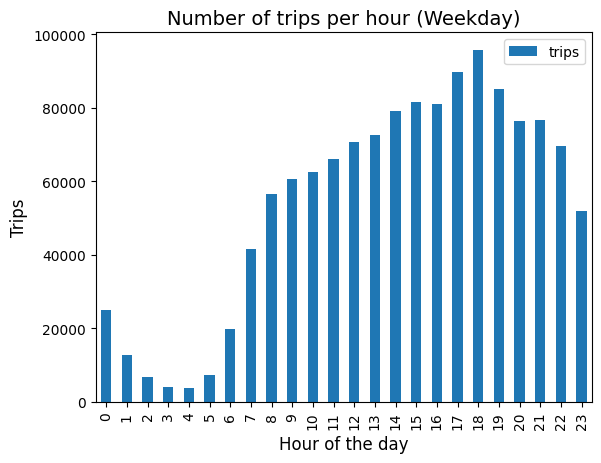

In [134]:
# Compare traffic trends for the week days and weekends

df[~(df.tpep_pickup_dayofweek.isin(['Sunday','Saturday']))].groupby(['tpep_pickup_hour']).agg(
    trips=('tpep_pickup_hour', 'count')
).plot.bar()

plt.title('Number of trips per hour (Weekday)', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Trips', fontsize=12)
plt.show()

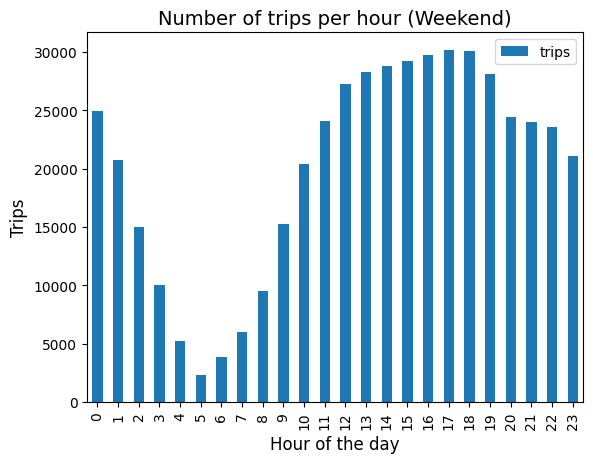

In [135]:
df[df.tpep_pickup_dayofweek.isin(['Sunday','Saturday'])].groupby(['tpep_pickup_hour']).agg(
    trips=('tpep_pickup_hour', 'count')
).plot.bar()

plt.title('Number of trips per hour (Weekend)', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Trips', fontsize=12)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [136]:
# Find top 10 pickup and dropoff zones

zone_hour_pickup = merged_df.groupby(['zone','tpep_pickup_hour']).agg(
    trips=('zone', 'count')
)

zone_hour_pickup_sorted = zone_hour_pickup.sort_values(by='trips',ascending=False)
zone_hour_pickup_sorted.reset_index(inplace=True)
zone_hour_pickup_sorted.head(10)

,zone,tpep_pickup_hour,trips
0,Midtown Center,18,7297
1,Midtown Center,17,7020
2,JFK Airport,22,6555
3,JFK Airport,16,6545
4,JFK Airport,15,6512
5,Midtown Center,16,6506
6,Upper East Side South,18,6451
7,Upper East Side South,17,6445
8,Upper East Side South,14,6437
9,Upper East Side South,15,6405


In [137]:
# Add Drop off hour
merged_df["tpep_dropoff_hour"] = pd.to_datetime(merged_df["tpep_dropoff_datetime"]).dt.hour

In [138]:
# Need to create a new merged DF joining drop location if
merged_df2 = pd.merge(merged_df,zones,how='inner',left_on='DOLocationID',right_on='LocationID')
merged_df2.shape

(1753215, 40)

In [139]:
zone_hour_drop = merged_df2.groupby(['zone_y','tpep_dropoff_hour']).agg(
    trips=('zone_y', 'count')
)

zone_hour_drop_sorted = zone_hour_drop.sort_values(by='trips',ascending=False)
zone_hour_drop_sorted.reset_index(inplace=True)
zone_hour_drop_sorted.head(10)

,zone_y,tpep_dropoff_hour,trips
0,Upper East Side South,18,6143
1,Upper East Side North,15,6137
2,Upper East Side North,18,5969
3,Upper East Side South,12,5967
4,Upper East Side South,15,5762
5,Upper East Side North,14,5705
6,Upper East Side North,17,5654
7,Upper East Side North,16,5621
8,Upper East Side South,14,5517
9,Upper East Side South,17,5404


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [143]:
merged_df2.shape[0]


1753215

In [140]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
total_trips = merged_df2.shape[0]
zone_drop = merged_df2.groupby(['zone_y']).agg(
    trips_d=('zone_y', 'count')
)
zone_drop['ratio_d']=round((zone_drop.trips_d/total_trips),6)
zone_drop.reset_index(inplace=True)
zone_drop.head(10)

,zone_y,trips_d,ratio_d
0,Allerton/Pelham Gardens,146,0.000083
1,Alphabet City,6685,0.003813
2,Arden Heights,30,0.000017
3,Arrochar/Fort Wadsworth,60,0.000034
4,Astoria,5026,0.002867
5,Astoria Park,38,0.000022
6,Auburndale,189,0.000108
7,Baisley Park,1732,0.000988
8,Bath Beach,129,0.000074
9,Battery Park,1003,0.000572


In [141]:
zone_pick = merged_df2.groupby(['zone_x']).agg(
    trips_p=('zone_x', 'count')
)
zone_pick['ratio_p']=round((zone_pick.trips_p/total_trips),6)
zone_pick.reset_index(inplace=True)
zone_pick.head(10)

,zone_x,trips_p,ratio_p
0,Allerton/Pelham Gardens,31,0.000018
1,Alphabet City,1769,0.001009
2,Arden Heights,9,0.000005
3,Arrochar/Fort Wadsworth,21,0.000012
4,Astoria,726,0.000414
5,Astoria Park,4,0.000002
6,Auburndale,23,0.000013
7,Baisley Park,499,0.000285
8,Bath Beach,23,0.000013
9,Battery Park,796,0.000454


In [144]:
# Merge the zone data for pick up and drop
merged_zone_pick_drop = pd.merge(zone_pick,zone_drop,how='outer',left_on='zone_x',right_on='zone_y')
merged_zone_pick_drop.head()

,zone_x,trips_p,ratio_p,zone_y,trips_d,ratio_d
0,Allerton/Pelham Gardens,31.0,0.000018,Allerton/Pelham Gardens,146.0,0.000083
1,Alphabet City,1769.0,0.001009,Alphabet City,6685.0,0.003813
2,Arden Heights,9.0,0.000005,Arden Heights,30.0,0.000017
3,Arrochar/Fort Wadsworth,21.0,0.000012,Arrochar/Fort Wadsworth,60.0,0.000034
4,Astoria,726.0,0.000414,Astoria,5026.0,0.002867


In [145]:
# 1. Display the 10 highest pickup
merged_zone_pick_drop = merged_zone_pick_drop.sort_values(by='ratio_p',ascending=False)
merged_zone_pick_drop.head(10)

,zone_x,trips_p,ratio_p,zone_y,trips_d,ratio_d
118,JFK Airport,90363.0,0.051541,JFK Airport,19021.0,0.010849
224,Upper East Side South,84799.0,0.048368,Upper East Side South,75685.0,0.043169
150,Midtown Center,83729.0,0.047757,Midtown Center,69815.0,0.039821
223,Upper East Side North,75507.0,0.043068,Upper East Side North,79416.0,0.045297
151,Midtown East,63968.0,0.036486,Midtown East,50869.0,0.029015
128,LaGuardia Airport,61969.0,0.035346,LaGuardia Airport,21399.0,0.012206
175,Penn Station/Madison Sq West,61602.0,0.035137,Penn Station/Madison Sq West,39026.0,0.022260
217,Times Sq/Theatre District,59510.0,0.033943,Times Sq/Theatre District,54846.0,0.031283
132,Lincoln Square East,59301.0,0.033824,Lincoln Square East,50222.0,0.028646
159,Murray Hill,53028.0,0.030246,Murray Hill,53007.0,0.030234


In [146]:
# 2. Display the 10 highest drop
merged_zone_pick_drop = merged_zone_pick_drop.sort_values(by='ratio_d',ascending=False)
merged_zone_pick_drop.head(10)

,zone_x,trips_p,ratio_p,zone_y,trips_d,ratio_d
223,Upper East Side North,75507.0,0.043068,Upper East Side North,79416.0,0.045297
224,Upper East Side South,84799.0,0.048368,Upper East Side South,75685.0,0.043169
150,Midtown Center,83729.0,0.047757,Midtown Center,69815.0,0.039821
217,Times Sq/Theatre District,59510.0,0.033943,Times Sq/Theatre District,54846.0,0.031283
159,Murray Hill,53028.0,0.030246,Murray Hill,53007.0,0.030234
151,Midtown East,63968.0,0.036486,Midtown East,50869.0,0.029015
132,Lincoln Square East,59301.0,0.033824,Lincoln Square East,50222.0,0.028646
226,Upper West Side South,48957.0,0.027924,Upper West Side South,50070.0,0.028559
131,Lenox Hill West,42332.0,0.024145,Lenox Hill West,47350.0,0.027008
63,East Chelsea,46457.0,0.026498,East Chelsea,45125.0,0.025738


In [147]:
# 3. Display the 10 lowest pickup
merged_zone_pick_drop = merged_zone_pick_drop.sort_values(by='trips_p',ascending=True)
merged_zone_pick_drop.head(10)

,zone_x,trips_p,ratio_p,zone_y,trips_d,ratio_d
104,Grymes Hill/Clifton,1.0,0.000001,Grymes Hill/Clifton,22.0,0.000013
79,Eltingville/Annadale/Prince's Bay,1.0,0.000001,Eltingville/Annadale/Prince's Bay,8.0,0.000005
161,New Dorp/Midland Beach,1.0,0.000001,New Dorp/Midland Beach,12.0,0.000007
100,Green-Wood Cemetery,1.0,0.000001,Green-Wood Cemetery,17.0,0.000010
24,Breezy Point/Fort Tilden/Riis Beach,1.0,0.000001,Breezy Point/Fort Tilden/Riis Beach,36.0,0.000021
173,Pelham Bay Park,1.0,0.000001,Pelham Bay Park,21.0,0.000012
121,Jamaica Bay,2.0,0.000001,Jamaica Bay,3.0,0.000002
107,Heartland Village/Todt Hill,2.0,0.000001,Heartland Village/Todt Hill,40.0,0.000023
194,Saint George/New Brighton,2.0,0.000001,Saint George/New Brighton,28.0,0.000016
187,Rikers Island,2.0,0.000001,NaN,NaN,NaN


In [148]:
# 4. Display the 10 lowest drop
merged_zone_pick_drop = merged_zone_pick_drop.sort_values(by='trips_d',ascending=True)
merged_zone_pick_drop.head(10)

,zone_x,trips_p,ratio_p,zone_y,trips_d,ratio_d
250,NaN,NaN,NaN,Freshkills Park,3.0,0.000002
121,Jamaica Bay,2.0,0.000001,Jamaica Bay,3.0,0.000002
192,Rossville/Woodrow,4.0,0.000002,Rossville/Woodrow,6.0,0.000003
254,NaN,NaN,NaN,Port Richmond,7.0,0.000004
79,Eltingville/Annadale/Prince's Bay,1.0,0.000001,Eltingville/Annadale/Prince's Bay,8.0,0.000005
161,New Dorp/Midland Beach,1.0,0.000001,New Dorp/Midland Beach,12.0,0.000007
253,NaN,NaN,NaN,Oakwood,12.0,0.000007
54,Crotona Park,2.0,0.000001,Crotona Park,13.0,0.000007
100,Green-Wood Cemetery,1.0,0.000001,Green-Wood Cemetery,17.0,0.000010
249,NaN,NaN,NaN,Broad Channel,18.0,0.000010


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [149]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
zone_hour_pickup_sorted.reset_index(inplace=True)
zone_hour_pickup_sorted[zone_hour_pickup_sorted.tpep_pickup_hour.isin([23,0,1,2,3,4])].head(10)

,index,zone,tpep_pickup_hour,trips
17,17,JFK Airport,23,6033
78,78,JFK Airport,0,3841
80,80,LaGuardia Airport,23,3806
107,107,East Village,23,3518
110,110,East Village,0,3493
123,123,West Village,23,3383
143,143,East Village,1,3206
156,156,Times Sq/Theatre District,23,3077
164,164,West Village,0,3033
166,166,Clinton East,23,2996


In [150]:
zone_hour_drop_sorted.reset_index(inplace=True)
zone_hour_drop_sorted[zone_hour_drop_sorted.tpep_dropoff_hour.isin([23,0,1,2,3,4])].head(10)
#Drop off

,index,zone_y,tpep_dropoff_hour,trips
157,157,East Village,23,2631
224,224,Clinton East,23,2237
226,226,Lenox Hill West,23,2227
230,230,Upper East Side North,23,2201
236,236,East Village,0,2175
237,237,Murray Hill,23,2170
266,266,Gramercy,23,2024
278,278,Upper West Side South,23,1977
289,289,East Chelsea,23,1930
297,297,Yorkville West,23,1906


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [152]:
# Filter for night hours (11 PM to 5 AM)

df_nighttime = df[df.tpep_pickup_hour.isin([23,0,1,2,3,4])]
df_daytime = df[~(df.tpep_pickup_hour.isin([23,0,1,2,3,4]))]

total_revenue = round(df['total_amount'].sum(),2)
nighttime_revenue = round(df_nighttime['total_amount'].sum(),2)
daytime_revenue = round(df_daytime['total_amount'].sum(),2)

print(f"NightTime Revenue = {nighttime_revenue} \nDayTime Revenue = {daytime_revenue} \nTotal Revenue = {total_revenue}" )
night_revenue_share = round(100* nighttime_revenue / total_revenue,2)
datyime_revenue_share = round(100* daytime_revenue / total_revenue,2)

print(f"NightTime Revenue Share is {night_revenue_share} %" )
print(f"DayTime Revenue Share is {datyime_revenue_share} %" )



NightTime Revenue = 5806577.57 
DayTime Revenue = 45495454.74 
Total Revenue = 51302032.31
NightTime Revenue Share is 11.32 %
DayTime Revenue Share is 88.68 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

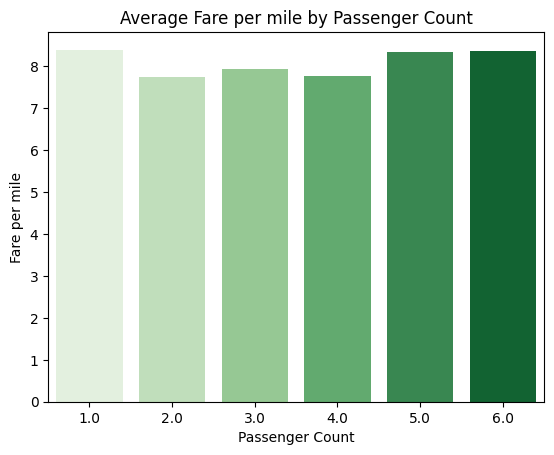

In [153]:
# Analyse the fare per mile per passenger for different passenger counts

# Analyse the fare per mile per passenger for different passenger counts

passenger_fare = df.groupby(['passenger_count']).agg(
    avg_amount=('total_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

passenger_fare['fare_per_mile']=round((passenger_fare.avg_amount)/(passenger_fare.avg_distance),2)

sns.barplot(data=passenger_fare, x='passenger_count', y='fare_per_mile', palette='Greens')
plt.title('Average Fare per mile by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per mile')
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

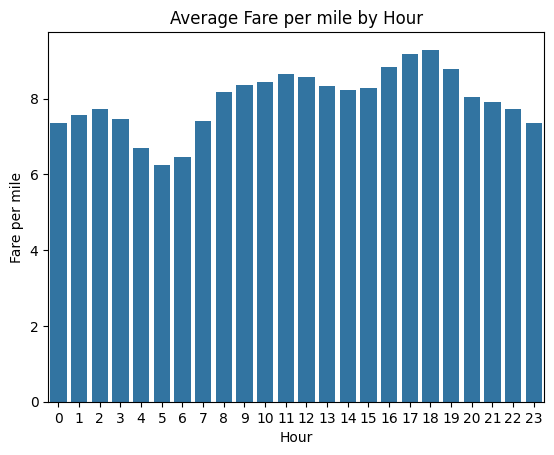

In [154]:
# Compare the average fare per mile for different days and for different times of the day
hourly_fare = df.groupby(['tpep_pickup_hour']).agg(
    avg_amount=('total_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

hourly_fare['fare_per_mile']=round((hourly_fare.avg_amount)/(hourly_fare.avg_distance),2)

sns.barplot(data=hourly_fare, x='tpep_pickup_hour', y='fare_per_mile')
plt.title('Average Fare per mile by Hour')
plt.xlabel('Hour')
plt.ylabel('Fare per mile')
plt.show()


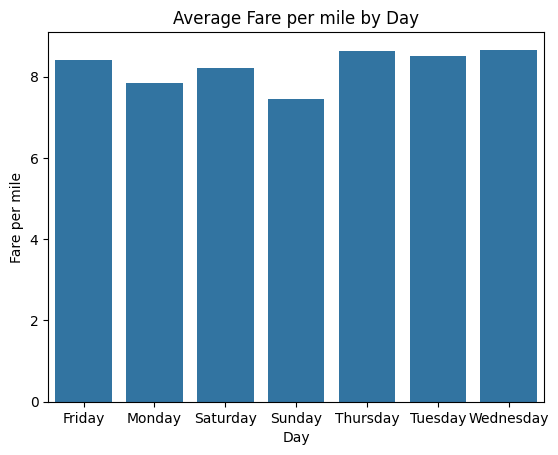

In [155]:
daily_fare = df.groupby(['tpep_pickup_dayofweek']).agg(
    avg_amount=('total_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

daily_fare['fare_per_mile']=round((daily_fare.avg_amount)/(daily_fare.avg_distance),2)

sns.barplot(data=daily_fare, x='tpep_pickup_dayofweek', y='fare_per_mile')
plt.title('Average Fare per mile by Day')
plt.xlabel('Day')
plt.ylabel('Fare per mile')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [157]:
# Compare fare per mile for different vendors

vendor_hourly_fare = df.groupby(['VendorID','tpep_pickup_hour']).agg(
    avg_amount=('total_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

vendor_hourly_fare['fare_per_mile']=round((vendor_hourly_fare.avg_amount)/(vendor_hourly_fare.avg_distance),2)
vendor_hourly_fare.reset_index(inplace=True)
vendor_hourly_fare.head(48)

,VendorID,tpep_pickup_hour,avg_amount,avg_distance,fare_per_mile
0,1,0,27.564657,3.688165,7.47
1,1,1,26.025888,3.450770,7.54
2,1,2,24.297954,3.126671,7.77
3,1,3,25.715799,3.485559,7.38
4,1,4,31.782485,4.933923,6.44
5,1,5,36.281087,6.037422,6.01
6,1,6,29.724802,4.693419,6.33
7,1,7,25.745358,3.485136,7.39
8,1,8,25.325273,3.128178,8.10
9,1,9,25.622922,3.087524,8.30


Text(0.5, 1.0, 'Vendor 2 - hourly fare')

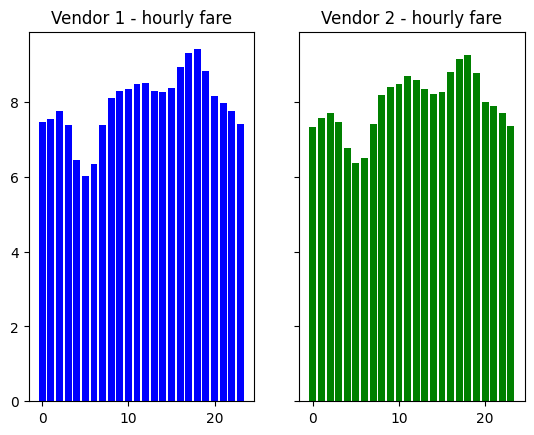

In [158]:
vendor_hourly_fare_v1 = vendor_hourly_fare[vendor_hourly_fare.VendorID == 1]
vendor_hourly_fare_v2 = vendor_hourly_fare[vendor_hourly_fare.VendorID == 2]
fig,ax = plt.subplots(ncols=2,sharey=True)
vendor1=ax[0].bar(vendor_hourly_fare_v1.tpep_pickup_hour, vendor_hourly_fare_v1.fare_per_mile,color='blue')
vendor2=ax[1].bar(vendor_hourly_fare_v2.tpep_pickup_hour, vendor_hourly_fare_v2.fare_per_mile,color='Green')
ax[0].set_title('Vendor 1 - hourly fare')
ax[1].set_title('Vendor 2 - hourly fare')

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [159]:
# Defining distance tiers

df['Tier']=df.trip_distance.apply(lambda x: "Tier1" if(x < 2) else ( "Tier2" if (x < 5)  else "Tier3"))

vendor_tier_fare = df.groupby(['VendorID','Tier']).agg(
    avg_amount=('total_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

vendor_tier_fare['fare_per_mile']=round((vendor_tier_fare.avg_amount)/(vendor_tier_fare.avg_distance),2)
vendor_tier_fare.reset_index(inplace=True)
vendor_tier_fare.head(10)

,VendorID,Tier,avg_amount,avg_distance,fare_per_mile
0,1,Tier1,16.676603,1.119566,14.90
1,1,Tier2,26.658508,2.940562,9.07
2,1,Tier3,64.774547,11.386493,5.69
3,2,Tier1,17.277564,1.155879,14.95
4,2,Tier2,27.608858,2.988527,9.24
5,2,Tier3,68.933303,11.816584,5.83


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

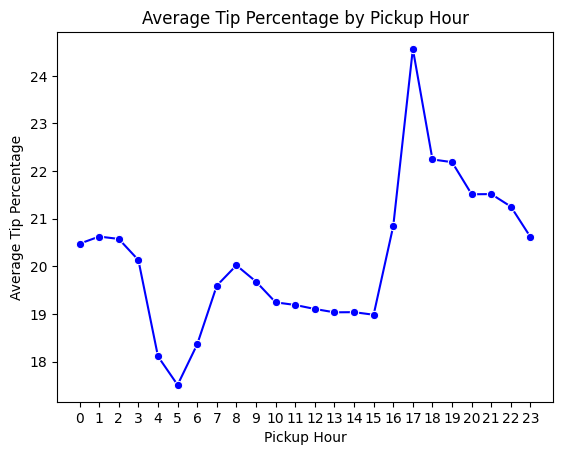

In [160]:
#  Analyze tip percentages based on distances, passenger counts and pickup times


df['tip_percentage']=round(100*(df.tip_amount/df.fare_amount),2)
avg_tip_hour = df.groupby('tpep_pickup_hour')['tip_percentage'].mean().reset_index()
sns.lineplot(data=avg_tip_hour, x='tpep_pickup_hour', y='tip_percentage', marker='o', color='blue')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.xticks(range(0, 24))
plt.show()

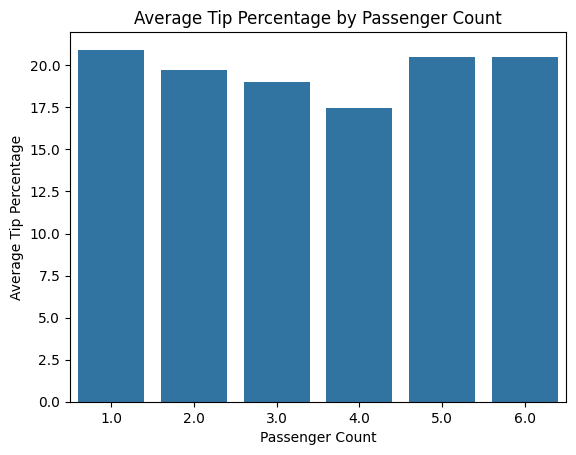

In [161]:
avg_tip_passenger_count = df.groupby(['passenger_count']).agg(
    tip_percentage=('tip_percentage', 'mean')
)
sns.barplot(data=avg_tip_passenger_count, x='passenger_count', y='tip_percentage')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()

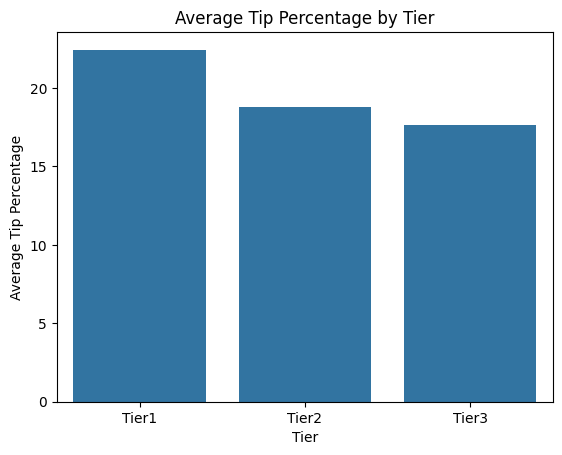

In [162]:
tier_tip_percentage = df.groupby(['Tier']).agg(
    tip_percentage=('tip_percentage', 'mean')
)

sns.barplot(data=tier_tip_percentage, x='Tier', y='tip_percentage')
plt.title('Average Tip Percentage by Tier')
plt.xlabel('Tier')
plt.ylabel('Average Tip Percentage')
plt.show()

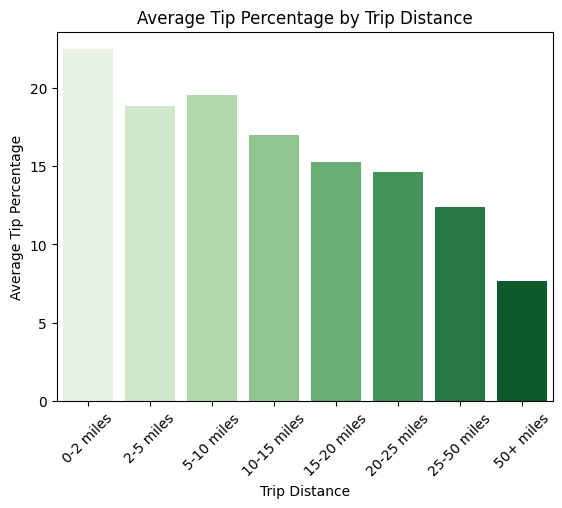

In [163]:
bins = [0, 2, 5, 10, 15, 20, 25, 50, 100]
labels = ['0-2 miles', '2-5 miles', '5-10 miles', '10-15 miles', '15-20 miles', '20-25 miles', '25-50 miles', '50+ miles']
df['distance_group'] = pd.cut(df['trip_distance'], bins=bins, labels=labels, right=False)

avg_tip_distance = df.groupby('distance_group')['tip_percentage'].mean().reset_index()
sns.barplot(data=avg_tip_distance, x='distance_group', y='tip_percentage', palette='Greens')
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Average Tip Percentage')
plt.xticks(rotation=45)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

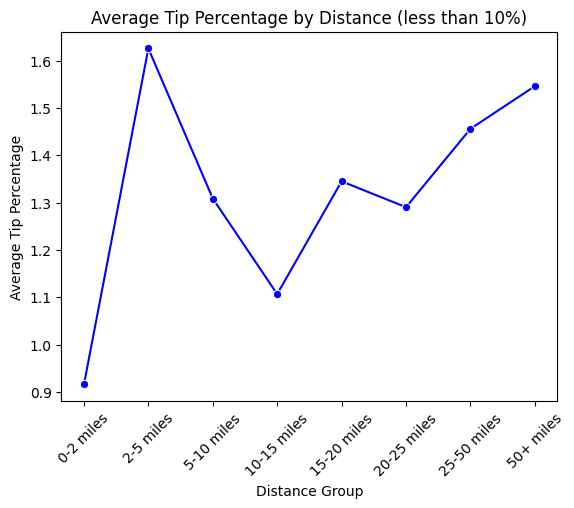

In [164]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df_tip_less_than_10 = df[df['tip_percentage']<=10]
df_tip_less_than_10 = df_tip_less_than_10.groupby(['distance_group']).agg(
    tip_percentage=('tip_percentage', 'mean')
)

sns.lineplot(data=df_tip_less_than_10, x='distance_group', y='tip_percentage', marker='o', color='blue')
plt.title('Average Tip Percentage by Distance (less than 10%)')
plt.xlabel('Distance Group')
plt.ylabel('Average Tip Percentage')
plt.xticks(rotation=45)
plt.show()


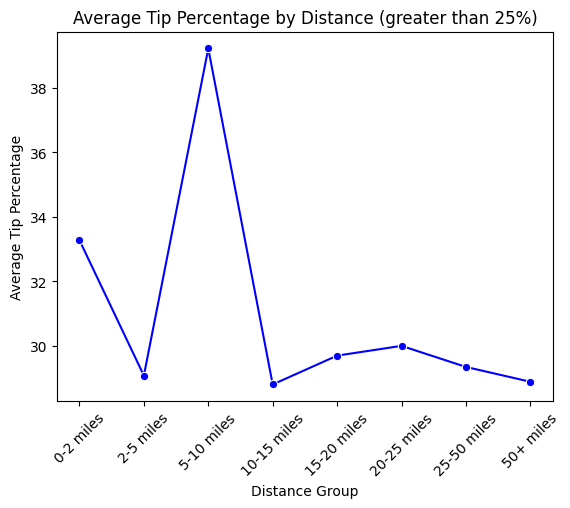

In [165]:
df_tip_more_than_25 = df[df['tip_percentage']>25]
df_tip_more_than_25 = df_tip_more_than_25.groupby(['distance_group']).agg(
    tip_percentage=('tip_percentage', 'mean')
)

sns.lineplot(data=df_tip_more_than_25, x='distance_group', y='tip_percentage', marker='o', color='blue')
plt.title('Average Tip Percentage by Distance (greater than 25%)')
plt.xlabel('Distance Group')
plt.ylabel('Average Tip Percentage')
plt.xticks(rotation=45)
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

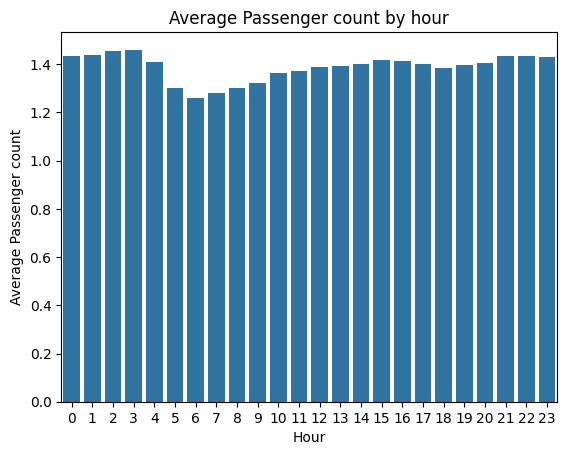

In [166]:
# See how passenger count varies across hours and days

passenger_count_hours = df.groupby(['tpep_pickup_hour']).agg(
    avg_passenger=('passenger_count', 'mean')
)

sns.barplot(data=passenger_count_hours, x='tpep_pickup_hour', y='avg_passenger')
plt.title('Average Passenger count by hour')
plt.xlabel('Hour')
plt.ylabel('Average Passenger count')
plt.show()



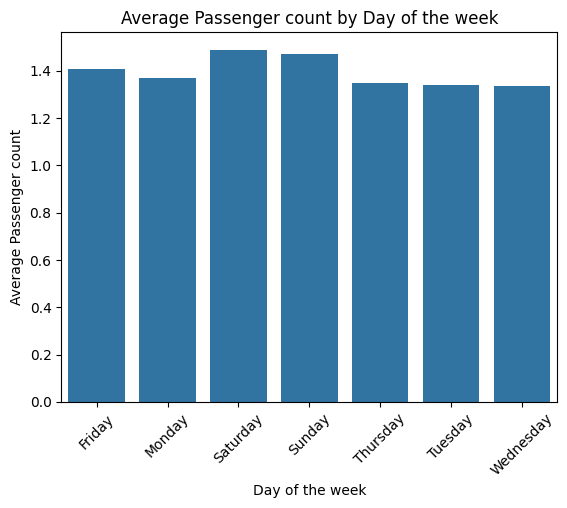

In [167]:
passenger_count_day = df.groupby(['tpep_pickup_dayofweek']).agg(
    avg_passenger=('passenger_count', 'mean')
)

sns.barplot(data=passenger_count_day, x='tpep_pickup_dayofweek', y='avg_passenger')
plt.title('Average Passenger count by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Average Passenger count')
plt.xticks(rotation=45)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

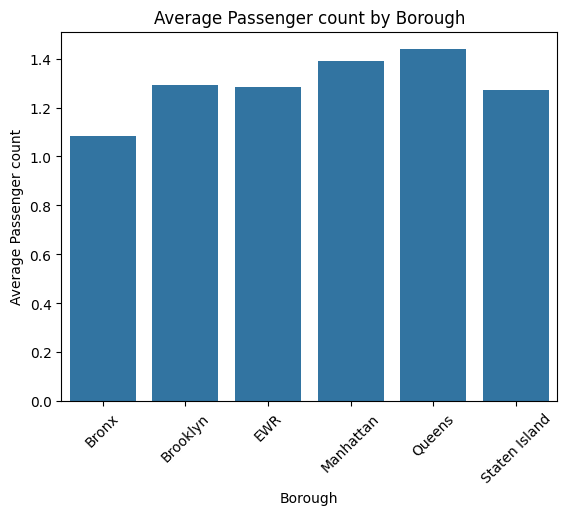

In [168]:
# How does passenger count vary across zones
# Used borough as zones here, as zones have much large value set
borough_passenger_count = merged_df2.groupby(['borough_x']).agg(
    avg_passenger=('passenger_count', 'mean')
)

sns.barplot(data=borough_passenger_count, x='borough_x', y='avg_passenger')
plt.title('Average Passenger count by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Passenger count')
plt.xticks(rotation=45)
plt.show()



In [169]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
merged_df2['avg_pc_zone']=merged_df2.groupby('zone_x')['passenger_count'].transform('mean')

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [170]:
# How often is each surcharge applied?

print(f"Total Trips = {merged_df2.shape[0]}")
print(f"Total Trips with Extra charges = {(merged_df2[merged_df2.extra>0]).shape[0]}")
print(f"Total Trips with improvement surcharge = {(merged_df2[merged_df2.improvement_surcharge>0]).shape[0]}")
print(f"Total Trips with congestion surcharge = {(merged_df2[merged_df2.congestion_surcharge>0]).shape[0]}")


Total Trips = 1753215
Total Trips with Extra charges = 1082951
Total Trips with improvement surcharge = 1753185
Total Trips with congestion surcharge = 1636931


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**1. Dynamic Zone-Based Dispatching**<br>
Increase fleet availability in zones like Midtown during peak hours (5 to 7 PM), and decrease idle time in low-demand areas during off-peak hours. <br>
Use pickup/dropoff ratios to balance cab distribution dynamically between over-served and under-served zones.

**2. Time-of-Day and Day-of-Week Optimization** <br>
Scale driver incentives and shift assignments according to hourly demand patterns.<br>
Encourage more availability on Wednesdays and Thursdays (marginally higher demand).<br>
Introduce standby-based shift models during early mornings and low-demand days.<br>
Consider reduced active fleet during low-revenue hours to optimize operational costs. <br>

**3. Zone Pre-Positioning Based on Forecasted Demand** <br>
Create heatmap forecasts by hour and zone.<br>
Pre-position taxis based on anticipated demand, especially before high-volume periods (e.g., late evenings in financial and entertainment districts).

**4. Data-Driven Incentives for Off-Peak Hours**<br>
Offer performance-based bonuses to drivers operating in underserved hours/zones.<br>
Pool services or dynamic pricing models to improve profitability and service efficiency during off-peak times.

**5. Customer Experience:** <br>
Improve satisfaction by offering smoother experiences, loyalty rewards, and better vehicle conditions to encourage tips.

**6. Surcharge Transparency:**<br>
Offer clear pricing and surcharge details to improve customer experience and avoid unnecessary charges.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**1. Prioritize High-Demand Zones During Peak Hours** <br>
Concentrate fleets in Midtown and Downtown zones during evening rush hours on weekdays.<br>
Stagger cab availability with additional presence during seasonal peaks in spring and fall.

**2. Adjust Fleet Deployment by Day of Week** <br>
Reduce active cabs on Sundays and early Mondays; reallocate drivers to higher-demand midweek shifts.<br>
Implement flexible schedules where drivers can opt for high-activity days to maximize earnings.

**3. Nighttime Zone Focus** <br>
Strategically position cabs at night in zones like: Times Square / Midtown West, Lower East Side, JFK and LaGuardia airport taxi lots <br>
Offer night shift incentives and enable real-time rerouting after drop-offs to nearby active zones.

**4. Airport Zone Staging Optimization** <br>
Maintain dedicated cab pools near JFK, LGA, and Newark during high-flight periods (early morning and late afternoon). <br>
Use flight schedules to anticipate surges and shift idle vehicles to holding lots.

**5. Hourly Demand-Based Zoning Model** <br>
Deploy an hour-by-hour zone activation strategy: <br>
- Early Morning: Focus near airports, hotels, and transit hubs.<br>
- Midday: Emphasize business districts and medical zones.<br>
- Evening: Prioritize entertainment and restaurant areas.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**1. Dynamic Pricing Based on Demand Patterns** <br>
Implement dynamic fare multipliers during:<br>
- Seasonal high-demand months (May, October).<br>
- Daily peak hours (5–7 PM).<br>
- Weather or event-driven surges (e.g., concerts, sports).<br>
Use historical and real-time trip density to automatically trigger fare increases in high-demand zones.

**2. Nighttime Fare Premiums** <br>
Introduce or increase nighttime surcharge (e.g., 10–15%) for trips from 10 PM to 5 AM, particularly in nightlife and transit zones. <br>
Offer flat-rate night service to popular locations (e.g., airports, entertainment zones) for predictability and simplicity. <br>

**3. Incentivize Digital Payments with Discounts or Points** <br>
Offer a small discount (e.g., $1 or 2%) for card/app payments to: <br>
- Reduce fare disputes and transaction times. <br>
- Encourage app usage for promotions, loyalty tracking.<br>
Optionally, implement a points-based system for repeat users booking digitally (e.g., every 10th ride is discounted).<br>

**4. Introduce Predictable Flat-Rates for High-Traffic Routes** <br>
Implement flat-rate fares for:<br>
- JFK/LGA to/from Midtown or Downtown.<br>
- Manhattan-Brooklyn and Manhattan-Queens corridors.<br>
These rates should be competitive yet profitable, updated quarterly using fare data trends and vendor benchmarks.<br>

**5. Distance-Tiered Fare Optimization** <br>
Introduce distance-based tiered pricing to balance short vs. long trip profitability:<br>
- 0–2 miles: Base fare + minimal per-mile charge.<br>
- 2–10 miles: Regular per-mile rate.<br>
- 10 miles: Slightly discounted per-mile rate to encourage long trips.<br>
This encourages longer trips while retaining competitiveness for short distances.<br>